2.3.1.1. Импортировать необходимые библиотеки:
   - `pandas` (обязательно),
   - при необходимости `numpy`,
   - `matplotlib.pyplot` для визуализации.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

2.3.1.2. Загрузить учебный датасет в `pandas.DataFrame` с помощью `pd.read_csv` (или другого подходящего метода).

In [2]:
df = pd.read_csv("S02-hw-dataset.csv") #Загрузка учебного датасета

2.3.1.3. Вывести:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики (`describe()` или аналог).

In [3]:
df.shape #Проверим размер таблицы

(41, 5)

In [4]:
df.head(-34) #Вывод элементов, не включая последние 34 

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0


In [5]:
df.info(verbose=True) #Вывод информаци о столбцах и типах, параметр verbose выводит всю информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
df.describe() #Вывод базовой описательной статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


2.3.2.1. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).

In [7]:
df.isna().mean() #Подсчет доли пропусков при помощи нахождения сренего арифметического по столбцам

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

2.3.2.2. Проверить наличие полностью дублирующих строк (через `duplicated()`).

In [8]:
df.duplicated().sum() #Найдем количество дублирующих строк

np.int64(1)

2.3.2.3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
   - отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
   - нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
   - другие логические противоречия, характерные для конкретного датасета.

In [9]:
df.convert_dtypes().dtypes #Проверим типы данных для удобства

user_id               Int64
age                   Int64
country      string[python]
purchases             Int64
revenue               Int64
dtype: object

In [10]:
df[df.duplicated(keep=False)] #Выведем строки, которые дублируются

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [11]:
df.loc[(df["age"] < 0) | (df["age"] >= 100)] #Найдем нереалистичные возрасты (больше или равно 100 и меньше 0)

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [12]:
df.loc[df["purchases"] < 0] #Выведем строку с отрицательным количеством покупок

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [13]:
df[df["age"].isna()] #Исходя из результатов вывода info, видим, что в столбце age два Null

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


In [14]:
df.loc[(df["purchases"] > 0) & (df["revenue"] == 0)] #Проверим есть ли строка с ненулевым количеством покупок и нулевым доходом

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [15]:
df[df["purchases"] == 0] #Проверим есть ли строка с нулевым количеством покупок и ненулевым доходом

,user_id,age,country,purchases,revenue
6,7,46.0,RU,0,0
17,18,24.0,RU,0,0
33,34,28.0,FR,0,0


2.3.2.4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

Итого, были обнаружены следующие проблемы: 
 - 9 и 40 строки - дубликаты, подозрительный нереаоистичный возраст - 120, 
 - количество покупок отрицательное в строке 5, 
 - 4 и 12 строки сожержат NaN значения в столбце возраста, 
 - 10 строка содержит нулевой доход при ненулевом количестве покупок.

2.3.3.1. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).

In [16]:
df.value_counts(subset=["country","age"]) #Посчитаем количество уникальных комбинаций качественного параметра country и столбца age

country  age  
RU       24.0     4
         31.0     2
CN       20.0     1
DE       18.0     1
CN       28.0     1
DE       32.0     1
         35.0     1
FR       22.0     1
         25.0     1
DE       36.0     1
         52.0     1
FR       33.0     1
         39.0     1
         45.0     1
         47.0     1
         52.0     1
         55.0     1
         28.0     1
         32.0     1
         120.0    1
         57.0     1
RU       21.0     1
         5.0      1
         26.0     1
         34.0     1
         46.0     1
         47.0     1
         54.0     1
US       23.0     1
         24.0     1
         35.0     1
         39.0     1
         42.0     1
         43.0     1
         51.0     1
Name: count, dtype: int64

2.3.3.2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
   - например, среднее и сумму по количественным признакам в разрезе категорий.

In [17]:
df.groupby("country").sum()[['purchases', 'revenue']].sort_values("purchases", ascending=False) #Выведем сумму покупок и доходов по качаественному признаку - стране.

,purchases,revenue
country,,
RU,62,10271
FR,51,8111
DE,39,8673
US,37,4459
CN,9,2108


2.3.3.3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).

In [18]:
age_bins = [0, 18, 30, 50, 70, 100] #Создадим "коридор" для возрастов из 6 значений
age_labels = ["<18","18-30","30-50","50-70","70+"] #Добавим описание для возрастных групп

df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, include_lowest=True) #Проведем группировку по выбранному "коруидору"
df["age_group"].value_counts() #Выведем количество элементов в каждой группе

age_group
30-50    17
18-30    13
50-70     6
<18       2
70+       0
Name: count, dtype: int64

In [19]:
df.groupby("age_group", observed=False)[["purchases","revenue"]].mean() #Посчитаем среденее количество покупок и дохода по возрастным категориям

,purchases,revenue
age_group,,
<18,6.000000,1296.000000
18-30,4.461538,565.538462
30-50,4.941176,1022.764706
50-70,5.000000,596.666667
70+,NaN,NaN


In [20]:
df.groupby(["country", "age_group"], observed=False)["revenue"].mean() #Посчитаем средний доход по возрастным категориям в каждой стране

country  age_group
CN       <18                  NaN
         18-30        1054.000000
         30-50                NaN
         50-70                NaN
         70+                  NaN
DE       <18          1104.000000
         18-30                NaN
         30-50        1857.000000
         50-70         702.000000
         70+                  NaN
FR       <18                  NaN
         18-30         310.666667
         30-50        1032.000000
         50-70         411.333333
         70+                  NaN
RU       <18          1488.000000
         18-30         644.500000
         30-50         722.800000
         50-70        1302.000000
         70+                  NaN
US       <18                  NaN
         18-30         222.500000
         30-50         760.500000
         50-70         342.000000
         70+                  NaN
Name: revenue, dtype: float64

В данных больше всего пользователей из России и Франции. США и Германия немного меньше, Китай ― единично. Возраст в основном лежит в диапазоне 18–50, то есть аудитория ― взрослые, регулярно совершающие покупки.
Также видим 2 пропущенных возраста и аномальное значение в 120 лет, плюс один ребёнок 5 лет — их стоит исключить как шум.

Молодые (18–24) тоже активно покупают, но покупок у них меньше, чем у более взрослых групп.
У детских и экстремальных возрастов данные либо отсутствуют, либо недостоверны.
Это соответствует обычной коммерческой картине — платежеспособность растёт с возрастом, затем постепенно снижается.

Отрицательные значения в purchases и revenue 0 → возможно тестовые или ошибочные записи
Значение 120 лет почти точно ошибка
Пользователь из RU с 5 годами возраста и 8 покупками — тоже выглядит как аномалия

2.4.1. **Одну гистограмму** для количественного признака:
   - осмысленный выбор числа корзин (`bins`),
   - подписи осей и заголовок.

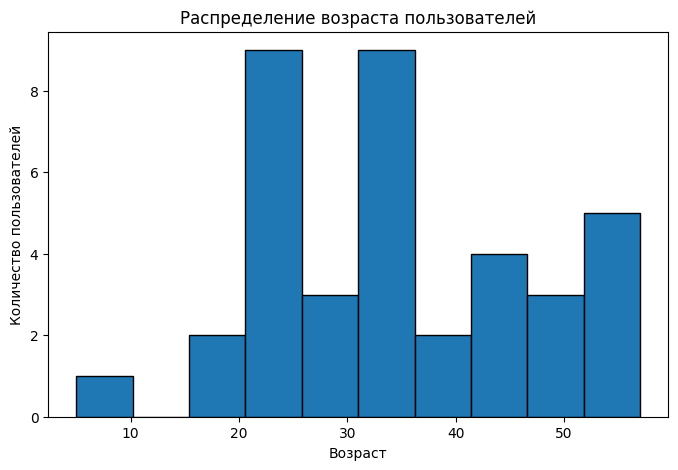

In [21]:
df_clean = df[df["age"].between(0,100)] #Уберем нереалистичные значения

plt.figure(figsize=(8,5)) #Задаем размер графика
plt.hist(df_clean["age"], bins=10, edgecolor='black') #Строим гистограмму c 10 корзинами и черной границей

plt.title("Распределение возраста пользователей") #Задаем название гистограммы
plt.xlabel("Возраст") #Подписываем ось х
plt.ylabel("Количество пользователей") #Подписываем ось у

plt.savefig("figures/hist_age.png") #Сохранение графика
plt.show() #Выводим гистограмму

2.4.2 **Один боксплот (boxplot)** для количественного признака:
   - можно как общий, так и по группам (например, по категориям),
   - подписи оси и заголовок.

<Figure size 800x500 with 0 Axes>

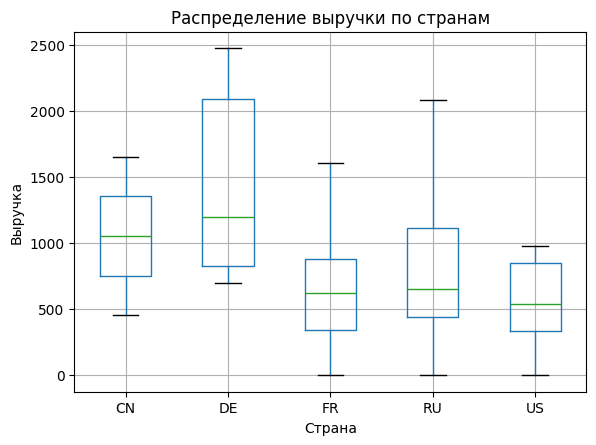

In [22]:
plt.figure(figsize=(8,5)) #Задаем размер графика

df.boxplot(column="revenue", by="country") #Строим по столбцу дохода и страны

plt.title("Распределение выручки по странам") #Задаем название гистограммы
plt.suptitle("") #Убираем второй заголовок
plt.xlabel("Страна") #Подписываем ось х
plt.ylabel("Выручка") #Подписываем ось у

plt.show() #Рисуем

2.4.3. **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
   - подписи обеих осей,
   - заголовок,
   - при желании можно добавить цвет/легенду для различения категорий.

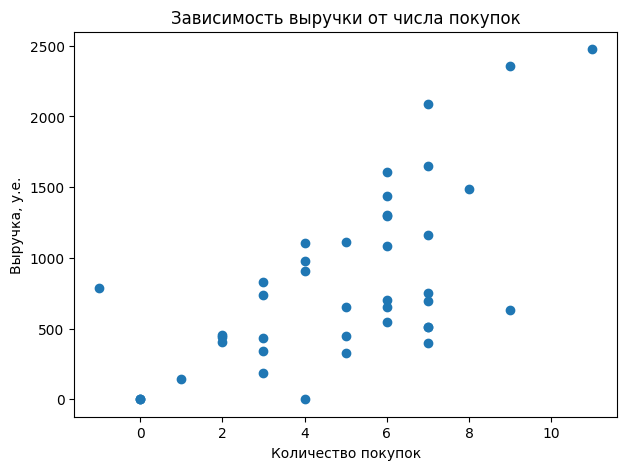

In [23]:
plt.figure(figsize=(7,5)) #Задаем размер графика

plt.scatter(df["purchases"], df["revenue"]) #Строим по столбцу покупок и дохода

plt.title("Зависимость выручки от числа покупок") #Задаем название гистограммы
plt.xlabel("Количество покупок") #Подписываем ось х
plt.ylabel("Выручка, у.е.") #Подписываем ось у

plt.show() #Выводим